In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Hyperparameters
timesteps = 10  # Number of time steps
num_features = 5  # Number of features
n_epochs = 100  # Number of epochs
learning_rate = 0.001

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(num_features, 50, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(50, 50, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.lstm3 = nn.LSTM(50, 50, batch_first=True)
        self.dropout3 = nn.Dropout(0.2)
        self.lstm4 = nn.LSTM(50, 50, batch_first=True)
        self.dropout4 = nn.Dropout(0.2)
        self.fc = nn.Linear(50, 1)  # Ensures the output is of size [batch_size, 1]
        self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x, _ = self.lstm3(x)
        x = self.dropout3(x)
        x, _ = self.lstm4(x)
        x = self.dropout4(x)
        x = x[:, -1, :]  # Take the last output, remove this?
        x = self.fc(x)   # Linear layer to map to 1 output
        x = self.sigmoid(x)
        return x
    
# Print out input and output shape
model = LSTMModel()
print(model)
x = torch.randn(1, 10, 5)
print(model(x).shape)


# GRU Model
class GRUModel(nn.Module):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.gru1 = nn.GRU(num_features, 50, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.gru2 = nn.GRU(50, 50, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.gru3 = nn.GRU(50, 50, batch_first=True)
        self.dropout3 = nn.Dropout(0.2)
        self.gru4 = nn.GRU(50, 50, batch_first=True)
        self.dropout4 = nn.Dropout(0.2)
        self.fc = nn.Linear(50, 1)  # Ensures the output is of size [batch_size, 1]
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x, _ = self.gru1(x)
        x = self.dropout1(x)
        x, _ = self.gru2(x)
        x = self.dropout2(x)
        x, _ = self.gru3(x)
        x = self.dropout3(x)
        x, _ = self.gru4(x)
        x = self.dropout4(x)
        x = x[:, -1, :]  # Take the last output, remove this?
        x = self.fc(x)   # Linear layer to map to 1 output
        x = self.sigmoid(x)
        return x

LSTMModel(
  (lstm1): LSTM(5, 50, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(50, 50, batch_first=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (lstm3): LSTM(50, 50, batch_first=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (lstm4): LSTM(50, 50, batch_first=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
torch.Size([1, 1])


In [2]:
import input

df = input.load_data('data/original_dataset/source_price.csv')
# Partition data into training, validation and test sets. Training data should be from date 12/07/2017 to 04/09/2018, validation data (from 04/10/2018 to 05/04/2018), and test data (from 05/07/2018 to 06/01/2018)
print(df.head())

from sklearn.preprocessing import MinMaxScaler

# Hardcodidly extracting the exact dates for the partitioning
df_train = df.loc[0:82]
df_val = df.loc[83:102]
df_test = df.loc[103:]

print(df_train.shape)

# print(df_val.head())
# print(df_val.tail())
# print(df_test.head())
# print(df_val)

df_train = df_train.drop(columns=['date'])
df_val = df_val.drop(columns=['date'])
df_test = df_test.drop(columns=['date'])


sc = MinMaxScaler(feature_range=(0,1))
df_train = sc.fit_transform(df_train)
df_val = sc.transform(df_val)
df_test = sc.transform(df_test)
print(df_train[0:5])
# print(df_train.shape)

def create_sequences_numpy_classification(data, n_days):
    X, y = [], []
    for i in range(n_days, len(data) - 1): 
        X.append(data.to_numpy()[i-n_days:i])
        y.append(1 if data[['Adj Close']].to_numpy()[i, -1] - data[['Adj Close']].to_numpy()[i-1, -1] > 0 else 0) #Classification task
    # Delete the first column of X
    X = np.delete(X, 0, axis=2)
    return np.array(X), np.array(y)

print(df[['Adj Close']].head())

# df = 

X, y = create_sequences_numpy_classification(df, timesteps)

X_train = X[:83 - timesteps].astype(np.float32) 
y_train = y[:83 - timesteps].astype(np.float32) 
X_val = X[83 - timesteps:101 - timesteps].astype(np.float32) 
y_val = y[83 - timesteps:101 - timesteps].astype(np.float32) 
X_test = X[101 - timesteps:].astype(np.float32) 
y_test = y[101 - timesteps:].astype(np.float32) 
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_train[0])
print(X_train[0])
print(X_train.dtype)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)



         date  wsj_mean_compound  cnbc_mean_compound  fortune_mean_compound  \
0   2017/12/7              0.296             -0.1366                 0.0000   
1   2017/12/8              0.000              0.0000                -0.2423   
2  2017/12/11              0.000              0.0000                 0.0000   
3  2017/12/12              0.000              0.0000                 0.0000   
4  2017/12/13              0.000              0.0000                 0.0000   

   reuters_mean_compound    Adj Close  
0                    0.0  2636.979980  
1                    0.0  2651.500000  
2                    0.0  2659.989990  
3                    0.0  2664.110107  
4                    0.0  2662.850098  
(83, 6)
[[0.91548214 0.         0.82728766 0.10191495 0.19179757]
 [0.34690741 0.31576514 0.40678881 0.10191495 0.2415458 ]
 [0.34690741 0.31576514 0.82728766 0.10191495 0.27063404]
 [0.34690741 0.31576514 0.82728766 0.10191495 0.28475031]
 [0.34690741 0.31576514 0.82728766 0.10191495

In [18]:
# # TEST
# split = (0.77);
# sequence_length=10;
# normalise= True
# input_dim=5
# input_timesteps=9
# neurons=50
# epochs=5
# prediction_len=1
# dense_output=1
# drop_out=0

# dataframe = pd.read_csv("data/original_dataset/source_price.csv")
# cols = ['Adj Close','wsj_mean_compound','cnbc_mean_compound','fortune_mean_compound',
#           'reuters_mean_compound']

# len_dataframe=dataframe.shape[0]

# i_split = int(len(dataframe) * split)
# data_train = dataframe.get(cols).values[:i_split]
# data_test  = dataframe.get(cols).values[i_split:]
# len_train  = len(data_train)
# len_test   = len(data_test)
# len_train_windows = None
# print('data_train.shape',data_train.shape)
# print('data_test.shape',data_test.shape)


# # In[15]:


# data_train[0:5]


# # In[16]:


# data_test[0:5]


# # In[19]:


# #get_test_data   
# data_windows = []
# for i in range(len_test - sequence_length):
#     data_windows.append(data_test[i:i+sequence_length])
# data_windows = np.array(data_windows).astype(float)
#  # get original y_test
# y_test_ori = data_windows[:, -1, [0]]
# print('y_test_ori.shape',y_test_ori.shape)

# window_data=data_windows
# win_num=window_data.shape[0]
# col_num=window_data.shape[2]
# normalised_data = []
# record_min=[]
# record_max=[]

# #normalize
# for win_i in range(0,win_num):
#     normalised_window = []
#     for col_i in range(0,1):#col_num):
#       temp_col=window_data[win_i,:,col_i]
#       temp_min=min(temp_col)
#       if col_i==0:
#         record_min.append(temp_min)#record min
#       temp_col=temp_col-temp_min
#       temp_max=max(temp_col)
#       if col_i==0:
#         record_max.append(temp_max)#record max
#       temp_col=temp_col/temp_max
#       normalised_window.append(temp_col)
#     for col_i in range(1,col_num):
#       temp_col=window_data[win_i,:,col_i]
#       normalised_window.append(temp_col)
#     normalised_window = np.array(normalised_window).T
#     normalised_data.append(normalised_window)
# normalised_data=np.array(normalised_data)

# # normalised_data=window_data
# data_windows=normalised_data#get_test_data
# x_test = data_windows[:, :-1]
# y_test = data_windows[:, -1, [0]]


# print('x_test.shape',x_test.shape)
# print('y_test.shape',y_test.shape)

# #get_train_data 
# data_windows = []
# for i in range(len_train - sequence_length):
#     data_windows.append(data_train[i:i+sequence_length])
# data_windows = np.array(data_windows).astype(float)
  
# window_data=data_windows
# win_num=window_data.shape[0]
# col_num=window_data.shape[2]

# normalised_data = []

# for win_i in range(0,win_num):
#     normalised_window = []
#     for col_i in range(0,1):#col_num):
#       temp_col=window_data[win_i,:,col_i]
#       temp_min=min(temp_col)
#       if col_i==0:
#         record_min.append(temp_min)#record min
#       temp_col=temp_col-temp_min
#       temp_max=max(temp_col)
#       if col_i==0:
#         record_max.append(temp_max)#record max
#       temp_col=temp_col/temp_max
#       normalised_window.append(temp_col)
#     for col_i in range(1,col_num):
#       temp_col=window_data[win_i,:,col_i]
#       normalised_window.append(temp_col)
#     normalised_window = np.array(normalised_window).T
#     normalised_data.append(normalised_window)
# normalised_data=np.array(normalised_data)

# # normalised_data=window_data
# data_windows=normalised_data
# x_train = data_windows[:, :-1]
# y_train = data_windows[:, -1,[0]]
# print('x_train.shape',x_train.shape)
# print('y_train.shape',y_train.shape)

data_train.shape (93, 5)
data_test.shape (28, 5)
y_test_ori.shape (18, 1)
x_test.shape (18, 9, 5)
y_test.shape (18, 1)
x_train.shape (83, 9, 5)
y_train.shape (83, 1)


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Instantiate models
lstm_model = LSTMModel()
gru_model = GRUModel()

# Define loss and optimizer
criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
gru_optimizer = optim.Adam(gru_model.parameters(), lr=0.001)

# Convert data to PyTorch tensors and create DataLoader
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

print(X_train_tensor.shape)
print(y_train_tensor.shape)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training function
def train_model(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch.view(-1, 1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f'Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss/len(train_loader)}')

# Train the LSTM model
print("Training LSTM Model")
train_model(lstm_model, lstm_optimizer, criterion, train_loader, n_epochs)

# Train the GRU model
print("Training GRU Model")
train_model(gru_model, gru_optimizer, criterion, train_loader, n_epochs)

torch.Size([73, 10, 5])
torch.Size([73])
Training LSTM Model
Epoch 1/100, Loss: 0.24574368198712668
Epoch 2/100, Loss: 0.2527195264895757
Epoch 3/100, Loss: 0.24848264455795288
Epoch 4/100, Loss: 0.24863005677858988
Epoch 5/100, Loss: 0.2432712862888972
Epoch 6/100, Loss: 0.24843832353750864
Epoch 7/100, Loss: 0.2512618800004323
Epoch 8/100, Loss: 0.24457769095897675
Epoch 9/100, Loss: 0.2426991065343221
Epoch 10/100, Loss: 0.24718846877415976
Epoch 11/100, Loss: 0.2441386729478836
Epoch 12/100, Loss: 0.2451886534690857
Epoch 13/100, Loss: 0.245221475760142
Epoch 14/100, Loss: 0.24247212707996368
Epoch 15/100, Loss: 0.24664328495661417
Epoch 16/100, Loss: 0.2537573923667272
Epoch 17/100, Loss: 0.24687449634075165
Epoch 18/100, Loss: 0.252289742231369
Epoch 19/100, Loss: 0.24709496398766836
Epoch 20/100, Loss: 0.24323380986849466
Epoch 21/100, Loss: 0.24151990314324698
Epoch 22/100, Loss: 0.2524384409189224
Epoch 23/100, Loss: 0.24658349653085074
Epoch 24/100, Loss: 0.24309500555197397


In [5]:
lstm_val_predictions = lstm_model(torch.tensor(X_val, dtype=torch.float32)).detach().numpy()
gru_val_predictions = gru_model(torch.tensor(X_val, dtype=torch.float32)).detach().numpy()

# Combine predictions to form new training data for the meta-learner
meta_X_train = np.concatenate((lstm_val_predictions, gru_val_predictions), axis=1)

print(meta_X_train.shape)

(18, 2)


In [6]:
# Define the meta-learner model
# it's a fully-connect neuralnetwork with three layers; the activation function for this model is the Rectified Linear Unit (ReLu).
# NOTE: The paper doesn't specify the number of neurons in the hidden layers, so I'm basing on the stanford paper
class MetaLearner(nn.Module):
    def __init__(self):
        super(MetaLearner, self).__init__()
        self.fc1 = nn.Linear(2, 30)
        self.fc2 = nn.Linear(30, 25)
        self.fc3 = nn.Linear(25, 20)
        self.fc4 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid() 
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x) #We also asume a sigmoid activation function for the output layer
        return x

In [7]:
# Train the meta-learner model
meta_model = MetaLearner()
meta_criterion = nn.BCELoss()
meta_optimizer = optim.Adam(meta_model.parameters(), lr=0.001)

meta_X_train_tensor = torch.tensor(meta_X_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

meta_train_dataset = TensorDataset(meta_X_train_tensor, y_val_tensor)
meta_train_loader = DataLoader(meta_train_dataset, batch_size=32, shuffle=True)

train_model(meta_model, meta_optimizer, meta_criterion, meta_train_loader, n_epochs)



Epoch 1/100, Loss: 0.6965428590774536
Epoch 2/100, Loss: 0.6960894465446472
Epoch 3/100, Loss: 0.6956515908241272
Epoch 4/100, Loss: 0.6952292323112488
Epoch 5/100, Loss: 0.6948218941688538
Epoch 6/100, Loss: 0.6944290399551392
Epoch 7/100, Loss: 0.6940500736236572
Epoch 8/100, Loss: 0.6937713027000427
Epoch 9/100, Loss: 0.6935024261474609
Epoch 10/100, Loss: 0.6932463049888611
Epoch 11/100, Loss: 0.6930198073387146
Epoch 12/100, Loss: 0.6927861571311951
Epoch 13/100, Loss: 0.6925565600395203
Epoch 14/100, Loss: 0.6923313140869141
Epoch 15/100, Loss: 0.6921104788780212
Epoch 16/100, Loss: 0.6918939352035522
Epoch 17/100, Loss: 0.6916818618774414
Epoch 18/100, Loss: 0.6914741396903992
Epoch 19/100, Loss: 0.6912704110145569
Epoch 20/100, Loss: 0.6910598278045654
Epoch 21/100, Loss: 0.6908572912216187
Epoch 22/100, Loss: 0.6906581521034241
Epoch 23/100, Loss: 0.6904626488685608
Epoch 24/100, Loss: 0.6902710199356079
Epoch 25/100, Loss: 0.6900836229324341
Epoch 26/100, Loss: 0.689900457859

In [8]:
#  the test dataset will be input into the sub-models again to produce intermediate test data for the meta-learner. Afterward, the meta-learner will use the intermediate test predictions from the sub-models to make the final predictions.

lstm_test_predictions = lstm_model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
gru_test_predictions = gru_model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()

meta_X_test = np.concatenate((lstm_test_predictions, gru_test_predictions), axis=1)
meta_X_test_tensor = torch.tensor(meta_X_test, dtype=torch.float32)

meta_test_predictions = meta_model(meta_X_test_tensor).detach().numpy()

# Calculate the accuracy of the meta-learner
meta_test_predictions = np.round(meta_test_predictions)
accuracy = np.mean(meta_test_predictions == y_test)
print(f'Accuracy: {accuracy}')
# Recall
recall = np.sum(np.logical_and(meta_test_predictions == 1, y_test == 1)) / np.sum(y_test)
print(f'Recall: {recall}')
# Precision
precision = np.sum(np.logical_and(meta_test_predictions == 1, y_test == 1)) / np.sum(meta_test_predictions)
print(f'Precision: {precision}')




Accuracy: 0.5263157894736842
Recall: 19.0
Precision: 10.0


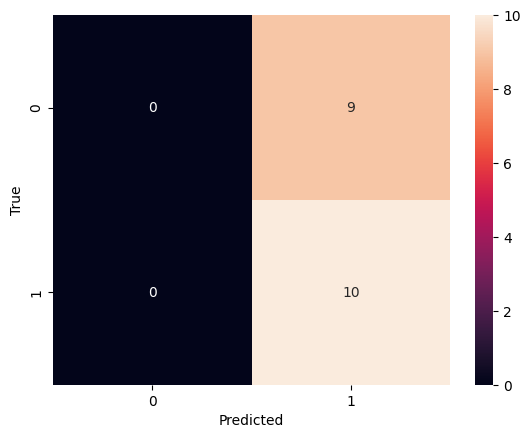

In [9]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, meta_test_predictions)

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()